In [1]:
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rcParams['figure.dpi'] = 300

In [2]:
sim = pd.read_csv('sim.csv', header=None).T
sim.columns = [6, 8, 10, 12]
sim.index = [6, 8, 10, 12]
sim

,6,8,10,12
6,0.3127,0.2783,0.2569,0.2397
8,0.2616,0.2029,0.1832,0.1649
10,0.2039,0.1591,0.1334,0.1143
12,0.1835,0.1183,0.0893,0.0748


In [3]:
sensei = pd.read_csv('sensei.csv', header=None).T
sensei.columns = [6, 8, 10, 12]
sensei.index = [6, 8, 10, 12]
sensei

,6,8,10,12
6,0.31214,0.26687,0.241950,0.226440
8,0.24266,0.18745,0.157290,0.138680
10,0.20353,0.14359,0.111780,0.092689
12,0.17897,0.11668,0.084682,0.066090


In [4]:
baseline = pd.read_csv('baseline.csv', header=None).T
baseline.columns = [6, 8, 10, 12]
baseline.index = [6, 8, 10, 12]
baseline

,6,8,10,12
6,0.24177,0.205470,0.186180,0.174470
8,0.17171,0.129770,0.108010,0.095043
10,0.13420,0.090777,0.069230,0.056890
12,0.11170,0.068330,0.047831,0.036613


In [5]:
(sim - sensei).max()

6     0.01894
8     0.01551
10    0.02591
12    0.02622
dtype: float64

In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

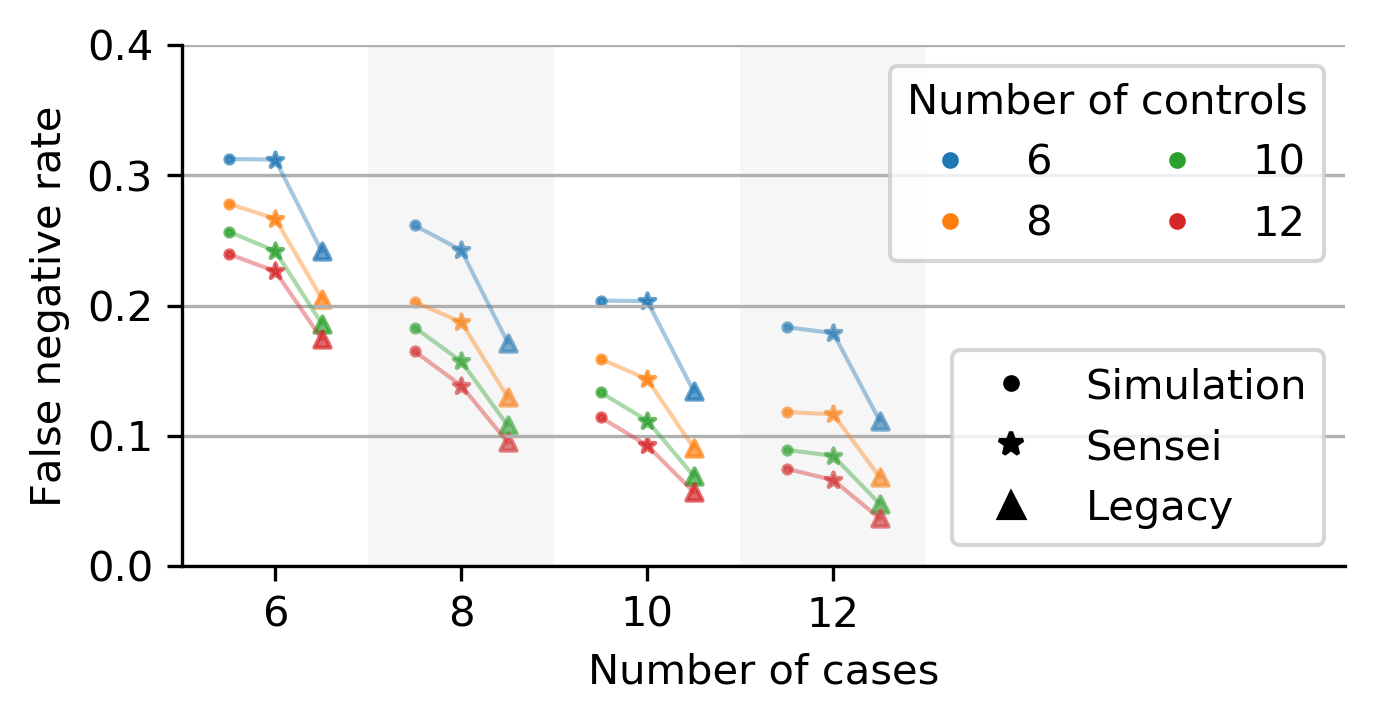

In [11]:
markersize = 15

M_list = [6, 8, 10, 12]

color_map = {
 #5: colors[4],
 6: colors[0],
 #7: colors[5],
 8: colors[1],
 #9: colors[6],
 10: colors[2],
 #11: colors[7],
 12: colors[3]}

fig = plt.figure(figsize=(5, 2.3))
ax = fig.add_subplot(1, 1, 1)

for i in M_list:
    for j in M_list:
        x = [i - 0.5, i + 0.0, i + 0.5]
        y = [sim.loc[i, j], sensei.loc[i, j], baseline.loc[i, j]]
        ax.plot(x, y, lw=1, c=color_map[j], alpha=0.4)
        ax.scatter(x[0], y[0], marker='.', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[1], y[1], marker='*', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[2], y[2], marker='^', color=color_map[j], s=markersize, alpha=0.7)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

current_ylim = ax.get_ylim()
for v in range(5, 14):
    if v % 4 == 0:
        ax.fill_between([v - 1, v + 1], 0, 1, facecolor='lightgray', alpha=0.2)

ax.set_ylim([0, 0.4])
ax.set_xticks(M_list)
ax.tick_params(axis='x', which = 'both', labelbottom=None)
ax.set_ylabel('False negative rate')
ax.set_xlabel('Number of cases')
ax.set_xlim(5, 17.5)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
#ax.set_xticks(list(i + 0.5 for i in list(x_map.values())))
#ax.set_xticklabels(list(cell_types_cosmetic_dict_short[i] for i in list(x_map.keys())), rotation=30, ha='right')

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color=color_map[i], linestyle="None", label=i) for i in color_map]

leg1 = ax.legend(handles=legend_elements, loc='upper right', title = 'Number of controls', ncol=2)

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color='k', linestyle="None", label='Simulation'),
                   mpl.lines.Line2D([0], [0], marker='*', color='k', linestyle="None", label='Sensei'),
                   mpl.lines.Line2D([0], [0], marker='^', color='k', linestyle="None", label='Legacy')]

ax.legend(handles=legend_elements, loc='lower right')
ax.add_artist(leg1)


ax.grid(axis='y', which='both')

In [8]:
((sim - sensei).abs() / sim).mean().mean()

0.07889603762203143

In [9]:
((sim - baseline).abs() / sim).mean().mean()

0.3823248863715808

In [12]:
fig.savefig("fig2a.pdf", transparent=True)